In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

**References**

- [Training LLM's to Reason in Continuous a Latent Space](https://arxiv.org/pdf/2412.06769)
- [From Explicit CoT to Implicit CoT: Learning to Internalize CoT Step by Step](https://arxiv.org/pdf/2405.14838)
    - simply deletes CoT steps rather than replacing them with continuous thoughts
    - the deleted steps become "internalized" in the model's parameters
    - gradually delete steps until all are deleted and all CoT is internalized
    - [github](https://github.com/da03/Internalize_CoT_Step_by_Step)

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch


class DrawTransformer():
    # Function to draw a box with text
    def draw_box(self, ax, x, y, width, height, text, color="white", fontsize=10):
        box = Rectangle(
            (x, y), width, height,
        )
        ax.add_patch(box)
        ax.text(
            x + width / 2, y + height / 2,
            text, color="black", fontsize=fontsize,
            ha="center", va="center"
        )

    # Function to draw an arrow
    def draw_arrow(self, ax, x1, y1, x2, y2):
        ax.annotate(
            "", xy=(x2, y2), xytext=(x1, y1),
            arrowprops=dict(arrowstyle="->", lw=1.5)
        )

    # Draw the main boxes for the decoder
    boxes = [
        (0.3, 0.05, 0.4, 0.05, "Output Embedding", "lightcoral"),
        (0.3, 0.15, 0.4, 0.05, "Positional Encoding", "lightblue"),
        (0.3, 0.25, 0.4, 0.05, "Masked Multi-Head\nAttention", "peachpuff"),
        (0.3, 0.35, 0.4, 0.05, "Add & Norm", "lightgray"),
        (0.3, 0.45, 0.4, 0.05, "Feed Forward", "lightblue"),
        (0.3, 0.55, 0.4, 0.05, "Add & Norm", "lightgray"),
        (0.3, 0.65, 0.4, 0.05, "Linear", "lightgreen"),
        (0.3, 0.75, 0.4, 0.05, "Softmax", "lightgreen")
    ]

    def draw(self, ax):
        for box in self.boxes:
            self.draw_box(ax, *box)

        # Draw arrows between the boxes
        arrow_positions = [
            (0.5, 0.1), (0.5, 0.15), 
            (0.5, 0.2), (0.5, 0.25),
            (0.5, 0.3), (0.5, 0.35),
            (0.5, 0.4), (0.5, 0.45),
            (0.5, 0.5), (0.5, 0.55),
            (0.5, 0.6), (0.5, 0.65),
            (0.5, 0.7), (0.5, 0.75),
        ]
        for i in range(0, len(arrow_positions) - 1, 2):
            self.draw_arrow(ax=ax,
                       x1=arrow_positions[i][0],
                       y1=arrow_positions[i][1],
                       x2=arrow_positions[i + 1][0],
                       y2=arrow_positions[i + 1][1])

        # Add annotations for latent state and Nx loop
        ax.text(arrow_positions[-4][0] + .25,
                arrow_positions[-4][1] + .02,
                'Latent State', fontsize=10,
                color="red"
               )

        self.draw_arrow(ax=ax, 
                   x1=arrow_positions[-4][0] + .25,      y1=arrow_positions[-4][1] + .025,
                   x2=arrow_positions[-4][0] + .05,      y2=arrow_positions[-4][1]   + .025,
                  )

        _= ax.axis('off')  # Turn off the axis

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow, Rectangle, PathPatch
from matplotlib.path import Path

class Plotter:
    def boxes(self, ax, title=None):
        # Define box dimensions
        box_width = 2
        box_height = 1

        # Define positions of the boxes (x, y coordinates)
        positions = [(2, 5), (2, 3), (2, 1)]

        # Define labels for the boxes
        labels = ["Un-embed", "Body", "Embed"]

        # Draw the boxes
        for pos, label in zip(positions, labels):
            rect = Rectangle(pos, box_width, box_height, edgecolor='black', facecolor='lightblue')
            ax.add_patch(rect)

            # Add a label to the box
            ax.text(pos[0] + box_width / 2, pos[1] + box_height / 2, label, ha='center', va='center')

        # Draw upward arrows between the boxes
        arrow_positions = [(3, 3.9), (3, 1.9)]  # Adjusted arrow start points (x, y)
        arrow_lengths = [0.8, 0.8]  # Adjusted arrow lengths to stop before entering boxes

        for pos, length in zip(arrow_positions, arrow_lengths):
            arrow = FancyArrow(pos[0], pos[1], 0, length, width=0.1, head_width=0.3, head_length=0.3, color='black')
            ax.add_patch(arrow)

        # Set limits and aspect ratio
        ax.set_xlim(0, 6)
        ax.set_ylim(0, 7)
        ax.set_aspect('equal')

        if title:
            ax.set_title(title)
        ax.axis('off')  # Turn off the axis
        
        return ax

    def transformer(self, ax, title=None):
        # Define box dimensions
        box_width = 2
        box_height = 1

        # Define positions of the boxes (x, y coordinates)
        positions = [(2, 5), (2, 3), (2, 1)]

        # Define labels for the boxes
        labels = ["Un-embed", "Body", "Embed"]

        # Draw the boxes
        for pos, label in zip(positions, labels):
            rect = Rectangle(pos, box_width, box_height, edgecolor='black', facecolor='lightblue')
            ax.add_patch(rect)

            # Add a label to the box
            ax.text(pos[0] + box_width / 2, pos[1] + box_height / 2, label, ha='center', va='center')

        # Draw upward arrows between the boxes
        arrow_positions = [(3, 3.9), (3, 1.9)]  # Adjusted arrow start points (x, y)
        arrow_lengths = [0.8, 0.8]  # Adjusted arrow lengths to stop before entering boxes

        for pos, length in zip(arrow_positions, arrow_lengths):
            arrow = FancyArrow(pos[0], pos[1], 0, length, width=0.1, head_width=0.3, head_length=0.3, color='black')
            ax.add_patch(arrow)

        # Create a custom path for the curved arrow
        path_data = [
            (Path.MOVETO, (3, 6)),  # Start at the top center of the top box
            (Path.LINETO, (3, 6.5)),  # Extend slightly above the top box
            (Path.LINETO, (4.5, 6.5)),  # Move to the right above all boxes
            (Path.LINETO, (4.5, -1)),  # Extend below all boxes
            (Path.CURVE3, (3.5, -0.5)),  # Curve upward and to the left below the bottom box
            (Path.CURVE3, (3, 1))  # Enter cleanly into the bottom of the bottom box
        ]

        codes, vertices = zip(*path_data)
        path = Path(vertices, codes)

        # Set fill=False to avoid any filled area around the path
        arrow_patch = PathPatch(path, edgecolor='red', linestyle='dashed', linewidth=1.5, fill=False)
        ax.add_patch(arrow_patch)

        # Add an arrowhead at the end of the path
        ax.annotate(
            '',
            xy=(3, 1),
            xytext=(3.2, 0.5),
            arrowprops=dict(
                arrowstyle='->',
                color='red',
                linewidth=1.5,
                mutation_scale=10  # Adjust this value to change the arrowhead size
            )
        )

        # Set limits and aspect ratio
        ax.set_xlim(0, 6)
        ax.set_ylim(-2, 7)  # Adjusted to show both above and below the diagram
        ax.set_aspect('equal')

        if title:
            ax.set_title(title)
        ax.axis('off')  # Turn off the axis
        
        return ax

    def latent_mode(self, ax, title=None):    
        # Define box dimensions
        box_width = 2
        box_height = 1

        # Define positions of the boxes (x, y coordinates)
        positions = [(2, 5), (2, 3), (2, 1)]

        # Define labels for the boxes
        labels = ["Un-embed", "Body", "Embed"]

        # Draw the boxes
        for pos, label in zip(positions, labels):
            rect = Rectangle(pos, box_width, box_height, edgecolor='black', facecolor='lightblue')
            ax.add_patch(rect)

            # Add a label to the box
            ax.text(pos[0] + box_width / 2, pos[1] + box_height / 2, label, ha='center', va='center')

        # Draw upward arrows between the boxes
        arrow_positions = [(3, 3.9), (3, 1.9)]  # Adjusted arrow start points (x, y)
        arrow_lengths = [0.8, 0.8]  # Adjusted arrow lengths to stop before entering boxes

        for pos, length in zip(arrow_positions, arrow_lengths):
            arrow = FancyArrow(pos[0], pos[1], 0, length, width=0.1, head_width=0.3, head_length=0.3, color='black')
            ax.add_patch(arrow)

        # Create a custom path for the curved arrow around the "Body" box
        path_data = [
            (Path.MOVETO, (3, 4)),  # Start at the top center of the "Body" box
            (Path.LINETO, (3.5, 4.5)),  # Move slightly up and to the right
            (Path.LINETO, (4.5, 4.5)),  # Move further to the right above the "Body" box
            (Path.LINETO, (4.5, 2)),  # Move down on the right side of the "Body" box
            (Path.CURVE3, (3.5, 2)),  # Curve leftward below the "Body" box
            (Path.LINETO, (3.15, 3))  # End at the bottom edge of the "Body" box
        ]

        codes, vertices = zip(*path_data)
        path = Path(vertices, codes)

        # Set fill=False to avoid any filled area around the path
        arrow_patch = PathPatch(path, edgecolor='red', linestyle='dashed', linewidth=1.5, fill=False)
        ax.add_patch(arrow_patch)

        # Add an arrowhead at the end of the path
        ax.annotate(
            '',
            xy=(3.1, 3.15),  # Extend upward into the "Body" box
            xytext=(3.15, 2.95),  # Start at the bottom edge of the "Body" box
            arrowprops=dict(
                arrowstyle='->',
                color='red',
                linewidth=1.5,
                mutation_scale=10
            )
        )

        # Set limits and aspect ratio
        ax.set_xlim(0, 6)
        ax.set_ylim(0, 7)  # Adjusted to show both above and below the diagram
        ax.set_aspect('equal')

        if title:
            ax.set_title(title)
        ax.axis('off')  # Turn off the axis
        
        return ax



# Reasoning in Latent Space

Recall the behavior of LLM's that use reasoning/"Chain of Thought"

Given prompt
$$
\x_{(1:\bar T)}
$$
rather than *immediately* producing response
$$
\y_{(1:\bar T)}
$$
giving computation trace
$$
\x,  \y
$$

- (dropping the sequence subscript that indexes tokens)

an LLM is trained to think "Step by Step"
- creating a sequence of steps
- the Chain of Thought ("reasoning" trace) $\rat$
- enumerating sequential steps of a process that produces the response
$$
    \rat =  [ \rat_{(1)}, \ldots, \rat_{(\text{num_thoughts})} ]
$$
- where each $\rat_\tp$ is a thought represented as multi-token sequence 

resulting in trace

$$
\x, \rat, \y
$$

All the tokens in sequences $\x, \rat, \y$ come from the vocabulary $\Vocab$.

Thus, all the token sequences are in "Natural Language".

But the reasoning trace $\rat$ is often hidden from the user.
- so $\rat$ is not visible to the user

Does the LLM have to "think" in Natural Language ?

Here is an illustration of Chain of Thought reasoning using 
- reasoning tokens
- limited to only Natural Language tokens


<br>

<table>
    <center><strong>Chain of Thought</strong></center>
    <tr>
        <img src="images/continuous_reasoning_CoT.img">
    </tr>
    
Attribution: https://arxiv.org/pdf/2412.06769#page=2
</table>

(Note: paper uses $\x$ as a denotation of the output sequence vs. our standard of $\y$)

**Note**

We are not quite precise in referring to the elements of the sequence as "tokens"

Technically:
- the elements of the depicted reasoning trace are the  dense *embedding vectors* associated with the tokens
    - token: syntax; embedding: vector
    - one-to-one correspondence
- key point: elements of the reasoning are selected from a *finite vocabulary*
    - tokens/embeddings
    


Suppose we expanded the vocabulary of the reasoning trace
- to include embeddings
- that are **not restricted** to discrete categorical values  from a finite Vocabulary
- but which are continuous vectors

Being continuous rather than discrete
- enables a richer space of "thoughts"
- which can't be mapped back to a token from a fixed vocabulary

This is called *Chain of Continuous Thought (Coconut)*.

What do these non-verbal continuous "tokens" represent ?

Some theories
- pictures/diagrams that "visualize" the answer
- super-position of two (or more) continuations
    - e.g., narrow down multiple choice from 4 to 2 possibilities -- keep those 2 possibilities alive

<br>

<table>
    <center><strong>Chain of Thought</strong></center>
    <tr>
        <img src="images/continuous_reasoning_Coconut.img">
    </tr>
    
Attribution: https://arxiv.org/pdf/2412.06769#page=2
</table>

# Continuous thoughts

Where do the tokens that form the continuous thoughts come from ?

It is a simple adaptation of the Transformer architecture.

- see diagram below

In [4]:
# Initialize the figure and axis
fig_transf, ax = plt.subplots(figsize=(6, 10))

transf_plotter = DrawTransformer()
transf_plotter.draw(ax)
plt.close(fig_transf)

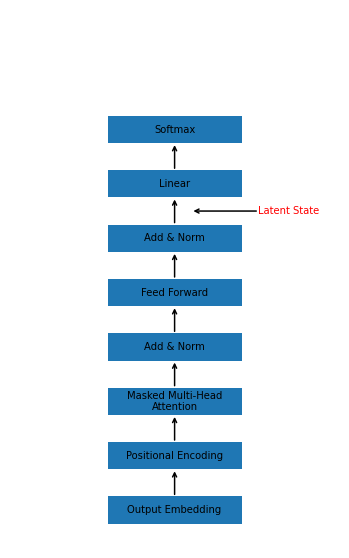

In [5]:
fig_transf

<br>

<table>
    <center><strong>Latent state</strong></center>
    <tr>
        <img src="images/continuous_reasoning_latent.png" width=80%>
    </tr>
    
</table>


The Transformer operates in Auto-regressive mode:

- outputs one token at a time
- at step $\tt$ it's output $\hat\y_\tp$
- is appended to the previous output sequence $\hat\y_{(1:\bar \tt-1)}$
- which becomes the input for step $\tt+1$

The tokens (vectors of length $| \V |$, where $\V$ is the Vocabulary of tokens) are
- *embedded* into vectors of length $d = d_\text{model}$
- and processed by the "body" of the Transformer
    - everything before the Linear layer
    
The output before the linear layer (referred to as the "Latent state")
- is a vector of length $d$
- which is *un-embedded* by the Linear layer into a vector of length $| \V |$
    - a probability vector over the finite, discrete set of language tokens $\V$
    - so a single token in $\V$ can be output
    

We represent this schematic description of the Transformer in the left plot "Language Mode".

See diagram below.


In [6]:
plotter = Plotter()

fig_combined, (ax1, ax2) = plt.subplots( 1, 2, figsize=(10,6))

ax_transformer = plotter.transformer(ax1, title="Transformer Schematic: Language Mode")
ax_latent = plotter.latent_mode(ax2, title="Transformer Schematic: Latent Mode")

plt.tight_layout()
plt.close(fig_combined)

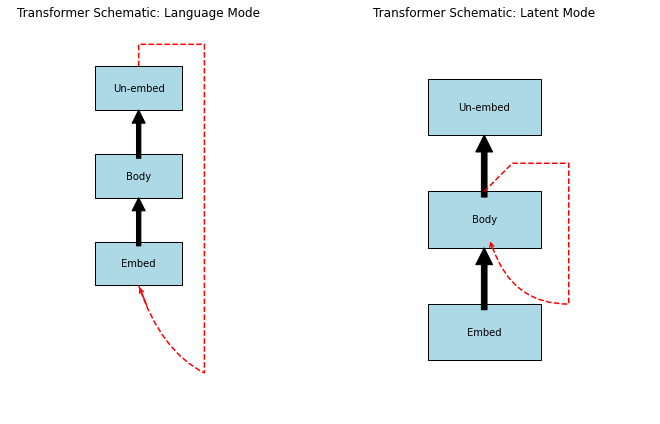

In [7]:
fig_combined

The Embed block
- transforms discrete tokens into vectors whose length $d$ is the path width of the Transformer

The Un-embed block
- transforms the latent state vector of length $d$ back into a Language token
    - which must then be embedded before it can be used in the next time step

The Continuous Thought tokens
- are the final vectors of the Body
    - length $d$
    - *Latent state*

They are *not* un-embedded.

They can be fed *directly* into the Body at the next time step
- by-passing the Un-embed of step $\tt$ and the subsequent Embed of step $(\tt+1)$.

See the schematic diagram for "Latent Mode"

# What does a Continuous token represent ?

Since a continuous token is not output to the user, it's vector representation
does not have to be interpretable.

But the authors conducted an experiment
- decode the continuous token using the Un-embed
- resulting in a probability vector over the Language tokens in the NLP Vocabulary

Here is the input to the LLM

    James decides to run 3 sprints 3 times a week.
    He runs 60 meters each sprint.
    How many total meters does he run a week ?
    
There are several paths that lead to the correct answer ($3*3*60 = 540$)
- First compute $(3*3)$, then multiple the result by $60$
    - leading to outputting $9$ as the first token of the reasoning trace
- First compute $(60*3)$
    - leading to outputting $180$ as the first token of the reasoning trace

When the continuous thought vector is un-embedded
- it shows a probability distribution over the likely next tokens: $9$ and $180$

The authors interpret the thought vector as a "super-position" of possible next tokens.

<table>
    <center><strong>Decoding a Continuous Thought</strong></center>
    <tr>
        <img src="images/continuous_reasoning_decode.png">
    </tr>
    
Attribution: https://arxiv.org/pdf/2412.06769#page=7
</table>


Absent "latent mode"
- the LLM would have to commit to **one** of the choices
    - e.g., "180" has the highest probability
    - in extending the reasoning trace
- by not committing immediately:
    - the LLM can "simultaneously" explore **both** possibilities
    - essentially allowing multiple traces (one beginning with "180", another beginning with "9")

The authors interpret this as the LLM
- performing a search across possible completions
- preserving possibilities
- until a later point in time

# Training the LLM to reason in mixed language/latent mode

An LLM can be trained in CoT reasoning by using examples of reasoning traces
$$
\x, \rat, \y
$$

But this works only is the tokens of every thought in $\rat$ are *language* tokens.

How do we train when $\rat$ is a mixture of language and continuous tokens ?
- the continuous tokens are *defined* by training; not pre-specified

**Clarification**

Trace $\rat$ consists of
- a number of *steps*
- each step consists of $c$ "thoughts" (tokens: either language or continuous)

The authors use a clever technique:

Multi-stage training *curriculum* 
- different training set at each stage
- at stage $k$
    - replace the first $k$ *steps* ($k * c$ Natural Language tokens)
    - by continuous steps ($k * c$ continuous thoughts )
- stage $0$ is traditional CoT training examples

At stage $0$, the LLM learns how to reason.
- calculate a loss per language token in $\rat$
- guiding the learning-to-reason process

At subsequent stages, it learns to derive continuous tokens incrementally
- increasing $k$, the number of continuous thoughts

By proceeding incrementally
- the model does not "un-learn" traditional CoT in language tokens

The loss for continuous tokens
- is **masked** (not calculated)
    - no actual target with which to compare the prediction
- the loss of the language tokens following the continuous tokens
    - is reduced
    - when the preceding continuous tokens contribute to the prediction of the language tokens

The underlined elements in the diagram are the ones for which a loss is calculated.

Note
- each thought is a sequence of up to $c$ tokens

Continuous tokens bracketed by `<bot>, <eot>`

<table>
    <center><strong>Decoding a Continuous Thought</strong></center>
    <tr>
        <img src="images/continuous_reasoning_training.png">
    </tr>
    
Attribution: https://arxiv.org/pdf/2412.06769#page=4
</table>

# Why is Latent Space potentially powerful

The reasoning paradigm of "think before you speak" is very powerful
- CoT leads to better outcomes
- by (potentially) hiding the thinking steps from the user
    - enables model to 
        - reflect and revise
        - avoiding prematurely committing  to a final answer

Allowing the thinking to occur in latent space
- superposition of multiple answers: no premature commitment to final answer
- non-verbal thoughts
    - images (e.g., a map enables one to think in relative position rather than precise directions)
    

Recall our original model for dealing with sequences
- Recurrent models with latent state
    - control of Finite State Machine
    - long term memory (LSTM)
    
Do the (hidden) "thoughts" of CoT have the same effect ?
- Hidden thought: a reminder of what to do next/later (control)

    

In [8]:
print("Done")

Done
